In [8]:
############### PYTHON

from datetime import datetime, date
new_date = datetime(year=2018, month=10, day=13)
new_date.year
new_date.month

10

In [9]:
new_date.hour

0

In [7]:
from dateutil import parser
new_date = parser.parse("13th October 2018")
parser.parse("2018-10-13T15:53:20")

datetime.datetime(2018, 10, 13, 15, 53, 20)

In [20]:
############## NUMPY --- MORE MEMORY EFFICIENT!!!

import numpy as np
import datetime

np.datetime64("2018-11-03")
np.array(['2018-11-02', '2018-10-02', '2015-11-03'], dtype='datetime64')

### Numpy provides entrypoints to convert datetime objects to numpy datetime64
current = np.datetime64(datetime.datetime.now())
print(current)

### The numpy API doesn't provide ways to access the different parts of a datetime (year, hour, minute etc). 
### You will need pandas to do this.
import pandas as pd
pd.to_datetime(current).year

datetime.datetime.now()

### Arithmetic --------Numpy provides support to perform arithmetic with datetime64 objects

delta = np.datetime64("2018-11-03") - np.datetime64("2018-11-01")
delta

deltaM = np.datetime64("2018-12-03") - np.datetime64("2018-10-03")
deltaM

np.datetime64('2018-11-03') + np.timedelta64(14, 'D')
np.datetime64('2018-10-03 12:00') + np.timedelta64(6, 'h')

### CREATING A TIME SERIES LIST!!!

np.arange(10)
np.datetime64('2018-11-03') + np.arange(10)

2020-02-11T10:36:06.166389


array(['2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
       '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10',
       '2018-11-11', '2018-11-12'], dtype='datetime64[D]')

In [21]:
#### PANDAS ---- BETTER, uses NUMPY under the hood (memory friendly) + integration with PANDAS (arithmetic operations etc)

import pandas as pd
pd.to_datetime("14th of October, 2018")
pd.Timestamp(year=2018, month=10, day=14, hour=12, minute=0, second=30)
datetimes = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04',
'2015-08-04'])
series = pd.Series([10, 4, 14, 30], index=datetimes)
series['2015']
pd.date_range('2015-07-03', '2015-07-10')
pd.date_range('2018 Oct 1', periods = 10, freq = 'W')


DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

date = pd.to_datetime("14th of October, 2018")
date

Timestamp('2018-10-14 00:00:00')

In [23]:
# You can also use the Timestamp constructor directly

date = pd.Timestamp(year=2018, month=10, day=14, hour=12, minute=0, second=30)
python_datetime = date.to_pydatetime() ################################# can be converted back to PYTHON
print(date)
print(type(date))
print(python_datetime)
print(type(python_datetime))

2018-10-14 12:00:30
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2018-10-14 12:00:30
<class 'datetime.datetime'>


In [24]:
print(date.day)
print(date.dayofyear)
print(date.week)
print(date.month)
print(date.year)
print(date.hour)
print(date.minute)
print(date.second)

14
287
41
10
2018
12
0
30


In [25]:
############## Working with Time Series

datetimes = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
datetimes
series = pd.Series([10, 4, 14, 30], index=datetimes)
series
series['2015']

2015-07-04    14
2015-08-04    30
dtype: int64

In [26]:
series

2014-07-04    10
2014-08-04     4
2015-07-04    14
2015-08-04    30
dtype: int64

In [27]:
series['2014-08-04']

4

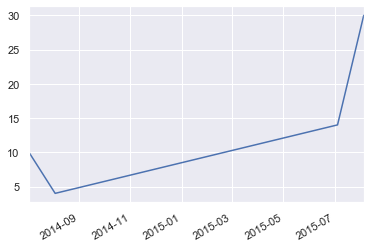

In [28]:
series.plot()

In [31]:
### Create a range of dates
### You can simple create a range of dates by providing two dates interval. By default, the interval is one day.

dates = pd.date_range('2015-07-03', '2015-07-15')
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15'],
              dtype='datetime64[ns]', freq='D')

In [32]:
### You can also be more specific by deciding how many periods and what unit to use for the frequency. E.g. here W means weeks

weeks = pd.date_range('2018 Oct 1', periods = 10, freq = 'W')
weeks

DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [33]:
### Timedelta --- Pandas allow you to do arithmetic which returns deltas:

weeks - weeks[0]

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days'],
               dtype='timedelta64[ns]', freq=None)

C:\Anaconda3\envs\ads4ldn\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':


1187.5904715401787

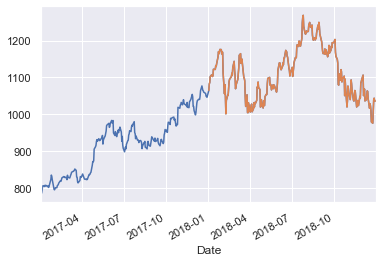

In [35]:
### Let's retrieve stock data from Google using the Yahoo API. This will be represented as a time series by date.
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2017', end='2019',
                       data_source='yahoo')
goog.head()
goog['Close'].plot()
close_prx = goog['Close']
close_prx['2018'].plot()
goog['Close']['2018'].argmax()
goog['Close']['2018'].idxmax()
goog['Close']['2018'].median()
goog['Close']['2018-07'].mean()

In [36]:
############ TIMEZONES

london = pd.Timestamp.now(tz="Europe/London")
brussels = london.tz_convert("Europe/Brussels")
print(london)
print(brussels)

2020-02-11 11:03:46.345928+00:00
2020-02-11 12:03:46.345928+01:00


In [44]:
us_pac = pd.Timestamp.now(tz="US/Pacific")
print(us_pac)

2020-02-11 03:09:47.334658-08:00


In [ ]:
### ****************** A time series can be represented as a Pandas Series where the index are points in time !!!!!!!!!!

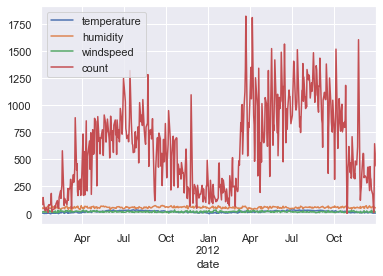

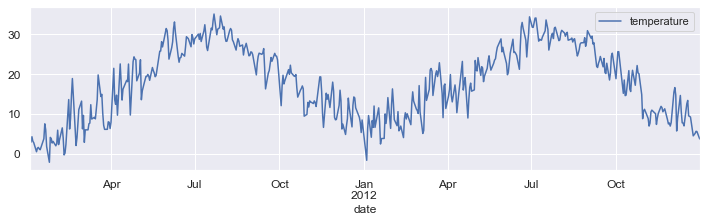

In [51]:
############### TIME SERIES

# Trend: a long term increase or decrease in the data
# Seasonality: a cyclic pattern in the data (e.g.: days of the week, quarters of the year)
# Noise: a non deterministic element in the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bikes = pd.read_csv('bikes.csv', parse_dates=['date'], index_col='date')
bikes.head()
bikes.plot()
bikes.plot(y='temperature', figsize=(12, 3), fontsize=12)

In [53]:
### Exercise: Number of bikes in a given month

jan_start = pd.Timestamp("1st January 2012")
jan_end = pd.Timestamp("31st January 2012")
bikes_jan = bikes[jan_start:jan_end]['count'].sum()
bikes_jan

5939.0

In [54]:
aug_start = pd.Timestamp(2012, 8, 1)
aug_end = pd.Timestamp(2012, 8, 31)
bikes_aug = bikes[aug_start:aug_end]['count'].sum()
bikes_aug

37025.0

In [55]:
print("{0:.0f} bikes in January vs {1:.0f} bikes in August.".format(bikes_jan, bikes_aug))

5939 bikes in January vs 37025 bikes in August.


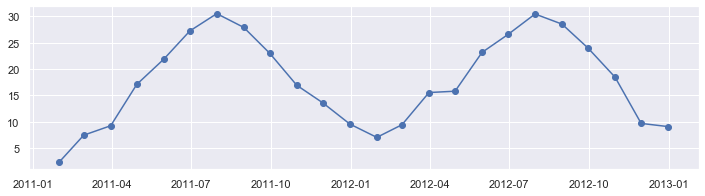

In [57]:
#### Resampling involves changing the frequency of your time series observations.
#Upsampling: increase the frequency of the samples, (e.g. from days to hours)
#Downsampling: decrease the frequency of the samples (e.g. from days to weeks)

#We use resampling because we have observations at the wrong frequency:
# ==>> They may be too granular or not granular enough!

bikes_monthly = bikes.resample('M').mean() ############### resample by MONTH, showing the MEAN !!!

plt.figure(figsize=(12, 3))
plt.plot(bikes_monthly.temperature, "-o")

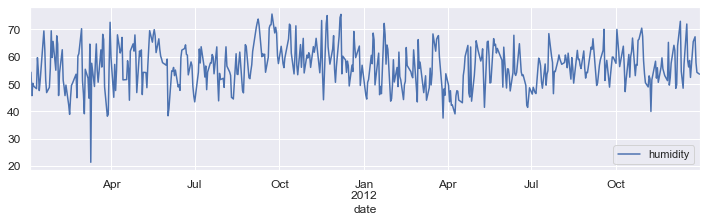

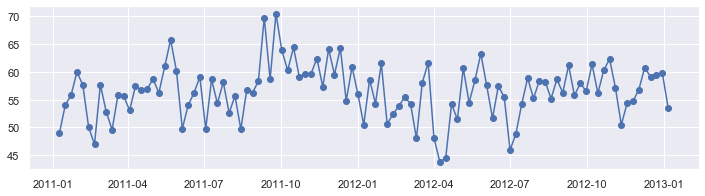

In [59]:
bikes.plot(y='humidity', figsize=(12, 3), fontsize=12)

bikes_weeks = bikes.resample('W').mean()
plt.figure(figsize=(12, 3))
plt.plot(bikes_weeks.humidity, "-o")

In [62]:
### Parsing custom date formats

alcohol_consumption = pd.read_csv('NZAlcoholConsumption.csv')
alcohol_consumption.head()

,DATE,TotalBeer,TotalSpirits,TotalWine
0,2004Q3,3.135,1.746,2.318
1,2000Q1,2.957,1.097,1.486
2,2006Q1,3.027,1.443,2.141
3,2000Q3,2.798,1.496,1.844
4,2011Q3,2.865,2.482,2.704


In [63]:
import re
def parse_quarter(string):
    """
    Converts a string from the format YYYYQN in datetime object at the end of quarter N.
    """
    
    # Note: you could also just retrieve the first four elements of the string
    # and the last one... Regex is fun but often not necessary
    year, qn = re.search(r'^(20[0-9][0-9])(Q[1-4])$', string).group(1, 2)
    
    # year and qn will be strings, pd.datetime expects integers.
    year = int(year)
    
    date = None
    
    if qn=='Q1':
        date = pd.Timestamp(year, 3, 31)
    elif qn=='Q2':
        date = pd.Timestamp(year, 6, 30)
    elif qn=='Q3':
        date = pd.Timestamp(year, 9, 20)
    else:
        date = pd.Timestamp(year, 12, 31)
        
    return date
# Check that it works!
print(parse_quarter("2000Q3")) # should show 2000-09-20 00:00:00

2000-09-20 00:00:00


In [64]:
### Giving the parser to pandas
# reload the data using your parser, set the index to the date 
alcohol_consumption = pd.read_csv('NZAlcoholConsumption.csv', 
                                  parse_dates=['DATE'], 
                                  date_parser=parse_quarter,
                                  index_col='DATE')
alcohol_consumption.sort_index(inplace=True)
alcohol_consumption.head()

,TotalBeer,TotalSpirits,TotalWine
DATE,,,
2000-03-31,2.957,1.097,1.486
2000-06-30,2.823,1.309,1.915
2000-09-20,2.798,1.496,1.844
2000-12-31,3.997,1.810,2.808
2001-03-31,3.037,1.240,1.287


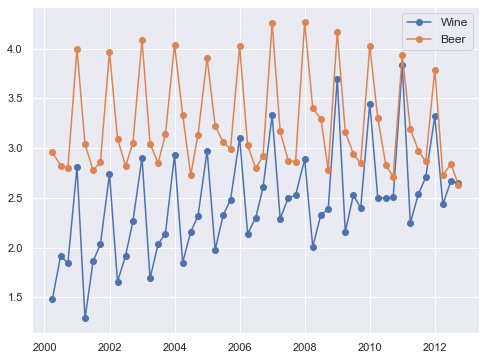

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine, 
         '-o', label='Wine')
plt.plot(alcohol_consumption.TotalBeer, 
         '-o', label='Beer')
plt.legend(fontsize=12)

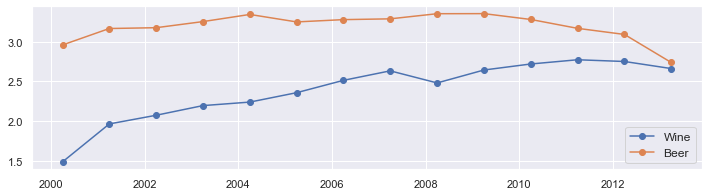

In [66]:
### resample data per year

alc_yearly = alcohol_consumption.resample('12M').mean()

plt.figure(figsize=(12, 3))
plt.plot(alc_yearly.TotalWine, "-o", label="Wine")
plt.plot(alc_yearly.TotalBeer, "-o", label="Beer")
plt.legend(fontsize=12)

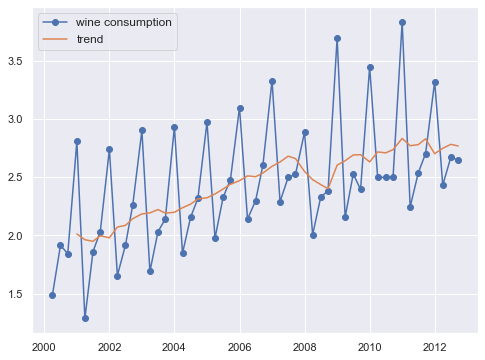

In [67]:
#### Moving Windows

plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine, '-o', label='wine consumption')
rolling_mean = alcohol_consumption.TotalWine.rolling(window=4).mean()
plt.plot(rolling_mean, label='trend')
plt.legend(fontsize=12);


In [68]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def rolling_avg_plot(window_size):
    plt.plot(alcohol_consumption.TotalWine, 
             '-o', label='wine consumption')
    rolling = alcohol_consumption.TotalWine.rolling(window=window_size).mean() #### AVERAGING AWAY THE SEASONAL COMPONENT!!
    plt.plot(rolling, label='trend')
    plt.legend();
    plt.show()

interact(rolling_avg_plot, window_size=(0, 10)); ################# CREATES A MOVING BAR!!!!!!!!!!!!!!!
                                                 ################# for window == 4 (or 8) ==>> remove the yearly seasonality!!!

interactive(children=(IntSlider(value=5, description='window_size', max=10), Output()), _dom_classes=('widget-…

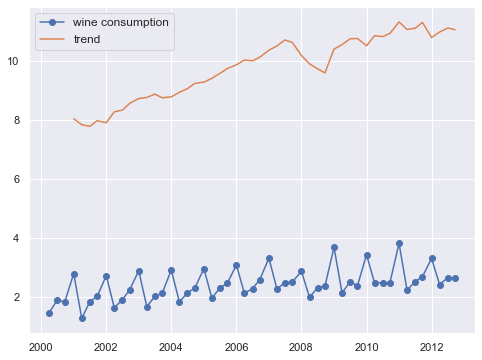

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine,'-o', label='wine consumption')
rolling_sum = alcohol_consumption.TotalWine.rolling(window=4).sum() ##sum() / std() #### ANY METHOD CAN BE APPLIED HERE!!!
plt.plot(rolling_sum, label='trend')
plt.legend(fontsize=12);

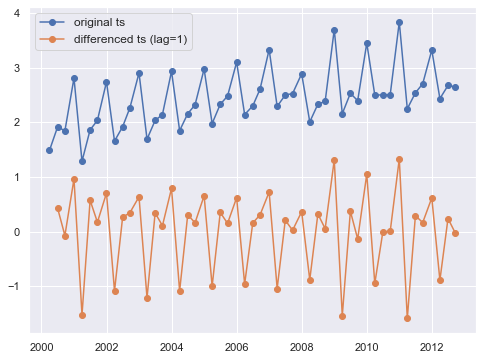

In [74]:
########### Differencing is a method of transforming a time series dataset.
## performed by subtracting a previous observation from the current observation. Here with a lag of 1:
#
#  difference(t) = observation(t) - observation(t-1)
# Using differencing can help remove the trend (lag of 1) and seasonality (lag of m) and expose the noise in the time series.

plt.figure(figsize=(8, 6))
plt.plot(alcohol_consumption.TotalWine, '-o', label="original ts")
plt.plot(alcohol_consumption.TotalWine.diff(1), '-o', label="differenced ts (lag=1)")
plt.legend(fontsize=12)

In [75]:
def differencing_plot(d):
    differenced_ts = alcohol_consumption.TotalWine.diff(d)
    plt.plot(differenced_ts, '-o')
    plt.show()

interact(differencing_plot, d=(1, 10));

interactive(children=(IntSlider(value=5, description='d', max=10, min=1), Output()), _dom_classes=('widget-int…

C:\Anaconda3\envs\ads4ldn\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


Text(0, 0.5, 'Autocorrelation')

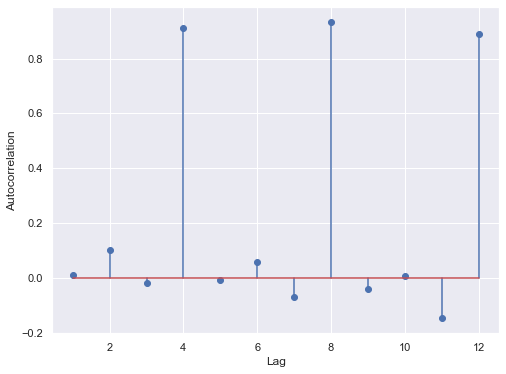

In [76]:
# Autocorrelation is the correlation (similarity) of a time series with a lagged version of itself.
#Ex: take values [1:10] then values [5:15] how similar are these two sequences of values?
#It helps expose the seasonality structure of the data.

lags = range(1, 13)
autocorrs = [alcohol_consumption.TotalWine.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(8, 6))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

In [77]:
#### We often model time series data as consisting of a trend and seasonal component, together with some observational noise
#
#### Often it may be helpful to resample the data in order to align it with our objectives. 
#Upsampling requires more care than downsampling
#
#### Not all data are created equal! We may discard past observations using methods such as sliding windows
#
#### Differencing is helpful in removing some of the trend and seasonality in the data